In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('term-test-1-result.csv')
df2 = pd.read_csv('term-test-2-result.csv')
#term-test-1-result.csv

In [3]:
#merged dataframe
merged_df = pd.merge(df1, df2, on='Registration Number', how='inner')
print(merged_df.head())

  Registration Number    Name_x  TT-1 Marks    Name_y  TT-2 Marks
0             REG1000  Student1          20  Student1           9
1             REG1001  Student2          11  Student2           3
2             REG1002  Student3          14  Student3          10
3             REG1003  Student4          13  Student4           5
4             REG1004  Student5           7  Student5          15


In [4]:
# best term test marks
merged_df['Best Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)

#  average term test marks
merged_df['Average Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

print(merged_df.head())


  Registration Number    Name_x  TT-1 Marks    Name_y  TT-2 Marks  Best Marks  \
0             REG1000  Student1          20  Student1           9          20   
1             REG1001  Student2          11  Student2           3          11   
2             REG1002  Student3          14  Student3          10          14   
3             REG1003  Student4          13  Student4           5          13   
4             REG1004  Student5           7  Student5          15          15   

   Average Marks  
0           14.5  
1            7.0  
2           12.0  
3            9.0  
4           11.0  


In [5]:
merged_df = merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'])

print(merged_df.head())

  Registration Number    Name_x    Name_y  Best Marks  Average Marks
0             REG1000  Student1  Student1          20           14.5
1             REG1001  Student2  Student2          11            7.0
2             REG1002  Student3  Student3          14           12.0
3             REG1003  Student4  Student4          13            9.0
4             REG1004  Student5  Student5          15           11.0


In [6]:
df3 = pd.read_csv('student_scores.csv')
df3.head()

,Registration Number,Attendance,Term Final Marks
0,REG1000,9,69
1,REG1001,8,95
2,REG1002,5,95
3,REG1003,10,59
4,REG1004,10,48


In [7]:

final_merged_df = pd.merge(merged_df, df3, on='Registration Number', how='inner')

final_merged_df['Final Marks'] = (final_merged_df['Term Final Marks'] * 0.7) + final_merged_df['Average Marks'] + final_merged_df['Attendance']

print(final_merged_df.head())


  Registration Number    Name_x    Name_y  Best Marks  Average Marks  \
0             REG1000  Student1  Student1          20           14.5   
1             REG1001  Student2  Student2          11            7.0   
2             REG1002  Student3  Student3          14           12.0   
3             REG1003  Student4  Student4          13            9.0   
4             REG1004  Student5  Student5          15           11.0   

   Attendance  Term Final Marks  Final Marks  
0           9                69         71.8  
1           8                95         81.5  
2           5                95         83.5  
3          10                59         60.3  
4          10                48         54.6  


In [8]:
final_merged_df.to_csv('final result.csv', index=False)

In [9]:
from google.colab import files
files.download('final result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Load the CSV file
df = pd.read_csv("final result.csv")
df

,Registration Number,Name_x,Name_y,Best Marks,Average Marks,Attendance,Term Final Marks,Final Marks
0,REG1000,Student1,Student1,20,14.5,9,69,71.8
1,REG1001,Student2,Student2,11,7.0,8,95,81.5
2,REG1002,Student3,Student3,14,12.0,5,95,83.5
3,REG1003,Student4,Student4,13,9.0,10,59,60.3
4,REG1004,Student5,Student5,15,11.0,10,48,54.6
5,REG1005,Student6,Student6,9,6.5,8,91,78.2
6,REG1006,Student7,Student7,16,11.5,7,80,74.5
7,REG1007,Student8,Student8,9,5.0,8,68,60.6
8,REG1008,Student9,Student9,6,3.5,5,86,68.7
9,REG1009,Student10,Student10,20,14.0,5,44,49.8


In [12]:

X = df[['Final Marks']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)



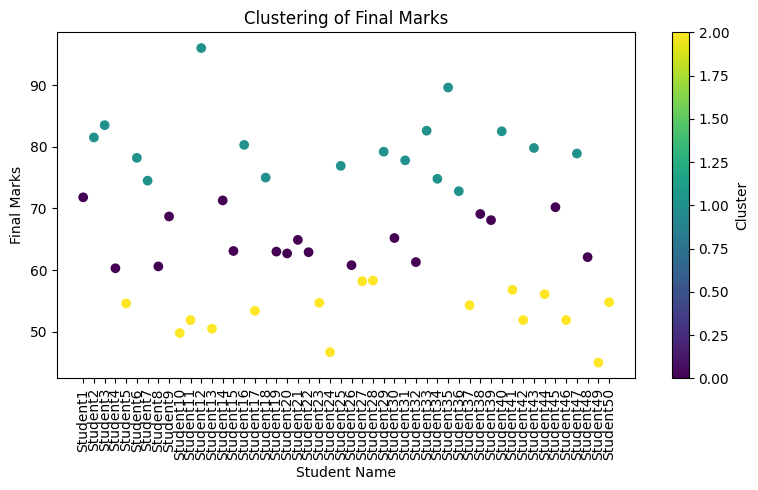

In [13]:

# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['Name_x'], df['Final Marks'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Student Name')
plt.ylabel('Final Marks')
plt.title('Clustering of Final Marks')
plt.xticks(rotation=90)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()